`https://www.kaggle.com/c/sberbank-russian-housing-market`

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn import model_selection, preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import mean_squared_log_error, r2_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin
from sklearn.base import BaseEstimator, clone

## Priprema podataka

In [33]:
train_df=pd.read_csv('input/train.csv')
test_df=pd.read_csv('input/test.csv')
macro_df=pd.read_csv('input/macro.csv')
train_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [10]:
train_df.shape

(30471, 292)

In [8]:
macro_df.head()

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.905,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
4,2010-01-05,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.836,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN


In [32]:
test_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,...,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,...,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,...,42,11,4,0,10,21,0,10,71,11
3,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,...,1,1,2,0,0,10,0,0,2,0
4,30478,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,...,5,1,1,0,2,12,0,1,11,1


In [11]:
macro_df.shape

(2484, 100)

### Transformacija izlaza

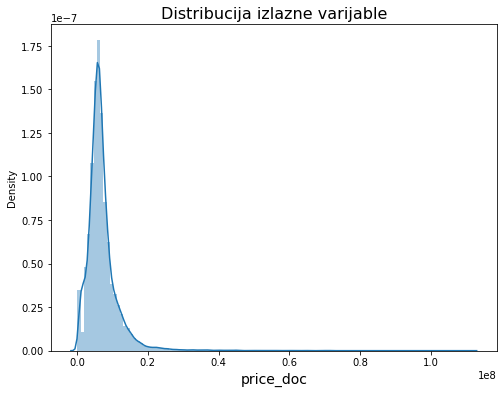

In [28]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(train_df['price_doc'], bins=120)
plt.xlabel('price_doc', fontsize=14)
plt.title('Distribucija izlazne varijable', fontsize=16)
plt.show()

S obzirom da je neravnomerna, tj nakrivljena, dobro bi bilo koristiti logaritmovanu skalu. https://datascience.stackexchange.com/questions/40089/what-is-the-reason-behind-taking-log-transformation-of-few-continuous-variables 

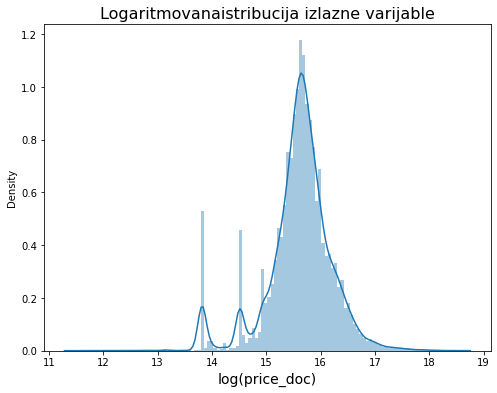

In [29]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(np.log(train_df['price_doc']), bins=120)
plt.xlabel('log(price_doc)', fontsize=14)
plt.title('Logaritmovanaistribucija izlazne varijable', fontsize=16)
plt.show()

Sad je malo bolje.

### Definisanje zadate metrike 

U samom zadatku je zadata metrika za korišćenje:

In [71]:
def rmsle_score(y_true, y_predict):
    msle = mean_squared_log_error(np.exp(y_true),y_predict)
    rmse = np.sqrt(mse)
    return (rmse)

rmsle = make_scorer(rmsle_score, greater_is_better=False)

In [65]:
def error_stats(cv_dict):
    stats = {}
    for k, v in cv_dict.items():
        stats.update({k: (v.mean(), v.std())})
    return (stats)

### Nedostajuće vrednosti

In [52]:
missing = train_df.columns[train_df.isnull().any()].tolist()
pd.isnull(train_df[missing]).sum().sort_values(ascending=False)

hospital_beds_raion                      14441
build_year                               13605
state                                    13559
cafe_avg_price_500                       13281
cafe_sum_500_max_price_avg               13281
cafe_sum_500_min_price_avg               13281
max_floor                                 9572
material                                  9572
num_room                                  9572
kitch_sq                                  9572
preschool_quota                           6688
school_quota                              6685
cafe_sum_1000_max_price_avg               6524
cafe_avg_price_1000                       6524
cafe_sum_1000_min_price_avg               6524
life_sq                                   6383
build_count_monolith                      4991
build_count_1946-1970                     4991
raion_build_count_with_material_info      4991
build_count_block                         4991
build_count_wood                          4991
build_count_f

Ima ih mnogo.

In [55]:
class CustomImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.missing_map = {}

    def fit(self, X, y=None):

        num_atts = X.select_dtypes(exclude='object').columns.tolist()

        for att in num_atts:
            self.missing_map.update({att: X[att].median()})

        cat_atts = X.select_dtypes(include='object').columns.tolist()

        for att in cat_atts:
            self.missing_map.update({att: X[att].value_counts().index[0]})

        return (self)

    def transform(self, X, y=None):

        for att, impute_value in self.missing_map.items():
            X[att] = X[att].fillna(impute_value)
        return (X)

### Tipovi i transformacija atributa

OVIM SE NISAM BAVILA

In [36]:
train_df.describe(exclude=['object'])

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


In [37]:
train_df.describe(include=['object'])

,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
count,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471
unique,1161,2,146,2,2,2,2,2,2,2,2,2,2,2,2,5
top,2014-12-16,Investment,Poselenie Sosenskoe,no,no,no,no,no,no,no,no,no,no,no,no,poor
freq,160,19448,1776,28543,28817,28155,30175,19600,29335,27649,29608,27427,28134,29690,29578,8018


In [40]:
macro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 100 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   timestamp                                   2484 non-null   object 
 1   oil_urals                                   2484 non-null   float64
 2   gdp_quart                                   2394 non-null   float64
 3   gdp_quart_growth                            2394 non-null   float64
 4   cpi                                         2453 non-null   float64
 5   ppi                                         2453 non-null   float64
 6   gdp_deflator                                2119 non-null   float64
 7   balance_trade                               2453 non-null   float64
 8   balance_trade_growth                        2394 non-null   float64
 9   usdrub                                      2481 non-null   float64
 10  eurrub     

Ima ih mnogo, ne bih se sada time bavila, više je isprobavanje. Biram nekoliko za join.

In [41]:
macro_df_selected=macro_df[['timestamp','gdp_annual','gdp_annual_growth','deposits_rate','deposits_growth','salary','salary_growth','labor_force','employment','marriages_per_1000_cap','divorce_rate','pop_natural_increase','pop_migration','mortality']]

In [44]:
train_df=pd.merge(train_df,macro_df_selected, on='timestamp')
train_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,deposits_growth,salary,salary_growth,labor_force,employment,marriages_per_1000_cap,divorce_rate,pop_natural_increase,pop_migration,mortality
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,0.009740,44898.7,0.168917,6643.626,0.708,8.5,3.8,1.1,5.1,9.7
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,0.009740,44898.7,0.168917,6643.626,0.708,8.5,3.8,1.1,5.1,9.7
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,0.009740,44898.7,0.168917,6643.626,0.708,8.5,3.8,1.1,5.1,9.7
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,0.009607,44898.7,0.168917,6643.626,0.708,8.5,3.8,1.1,5.1,9.7
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,0.018590,44898.7,0.168917,6643.626,0.708,8.5,3.8,1.1,5.1,9.7


In [45]:
train_df.set_index('id',inplace=True)
train_df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,deposits_growth,salary,salary_growth,labor_force,employment,marriages_per_1000_cap,divorce_rate,pop_natural_increase,pop_migration,mortality
id,,,,,,,,,,,,,,,,,,,,,
1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.009740,44898.7,0.168917,6643.626,0.708,8.5,3.8,1.1,5.1,9.7
2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.009740,44898.7,0.168917,6643.626,0.708,8.5,3.8,1.1,5.1,9.7
3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.009740,44898.7,0.168917,6643.626,0.708,8.5,3.8,1.1,5.1,9.7
4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.009607,44898.7,0.168917,6643.626,0.708,8.5,3.8,1.1,5.1,9.7
5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.018590,44898.7,0.168917,6643.626,0.708,8.5,3.8,1.1,5.1,9.7


In [74]:
X_train=train_df.drop('price_doc', axis=1)
y_train=train_df['price_doc']

Nisam koristila train_test_split s obzirom da imamo odvojeni test skup, i možemo ovde unakrsnu validaciju naravno. Možda nakon selekcije atributa možemo te csvove da sačuvano kao posebne fajlove, s obzirom da razdvajamo projekat na logičke celine tj. notebook-ove.

OVO BI MOŽDA VEĆ MOGLO U TREĆI NOTEBOOK NAKON PRIPREME PODATAKA

In [76]:
categorical_cols = list(X_train.select_dtypes(include='object').columns)
numerical_cols = list(X_train.select_dtypes(exclude='object').columns)

In [77]:
catagorical_preparation = Pipeline(
    steps=[('imputer',
            CustomImputer()), ('onehot',
                               OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[(
    'num', CustomImputer(),
    numerical_cols), ('cat', catagorical_preparation, categorical_cols)])

model = DecisionTreeRegressor(max_depth=10, random_state=42)

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model',
                                                               model)])

In [78]:
cv_dict = cross_validate(my_pipeline, X_train, y_train, cv=10, scoring=rmsle)
error_stats(cv_dict) #samo agregira rezultate po ovim merama

{'fit_time': (23.06145610809326, 1.9519109753413728),
 'score_time': (0.2430201530456543, 0.03543592840824071),
 'test_score': (nan, nan)}

Bilo bi fino da pustimo i ove algoritme negde na kraju

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb